In [1]:
import numpy as np
import pandas as  pd
import tensorflow as tf
from tensorflow import keras
#import keras
import matplotlib.pyplot as plt 
from tensorflow.keras import layers
from sklearn import *
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from ipynb.fs.defs.UtilitiesVED import *
plt.rcParams["figure.figsize"] = (20,10)
tf.autograph.set_verbosity(0)

## Import Data


In [2]:
X = pd.read_csv("../Data/data_UE2_600/X_600_TTI.csv", index_col=0)
y = pd.read_csv("../Data/data_UE2_600/y_600_TTI.csv", index_col=0)



In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, shuffle=False)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(354, 1280)
(354, 3840)
(236, 1280)
(236, 3840)


In [5]:
X_train = (X_train.to_numpy())
X_test = (X_test.to_numpy())
y_train = (y_train.to_numpy())
y_test = (y_test.to_numpy())

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_esc = scaler.transform(X_train)
X_test_esc = scaler.transform(X_test)

## Create a sampling layer


## Build the encoder


In [7]:
latent_dim = 100 # Latent Space dimension on the bottleneck
input_dim = X_train.shape[1]
ReLU = keras.layers.ReLU()

encoder_inputs = keras.Input(shape=( input_dim, ))
x = layers.Dense(350, activation=ReLU)(encoder_inputs)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000001D1482FAC40>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1280)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 350)          448350      ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 100)          35100      

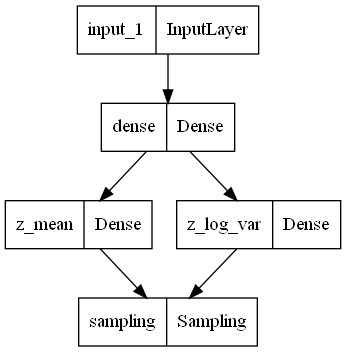

In [8]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(encoder, to_file='encoder.png')

## Build the decoder


In [9]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(300,  activation=ReLU)(latent_inputs)
decoder_outputs = layers.Dense(input_dim * 3, activation="linear")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 300)               30300     
                                                                 
 dense_2 (Dense)             (None, 3840)              1155840   
                                                                 
Total params: 1,186,140
Trainable params: 1,186,140
Non-trainable params: 0
_________________________________________________________________


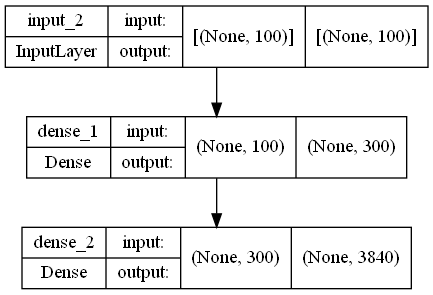

In [10]:
plot_model(decoder,  show_shapes=True, show_layer_names=True)

## Define the VAE as a Model with a custom train_step


## Train the VAE

In [11]:
vae = VAE(encoder, decoder, 1)

In [12]:
vae.compile(optimizer=keras.optimizers.Adam())

In [13]:
es = keras.callbacks.EarlyStopping(
    monitor="MSE",
    patience=4,
)

In [14]:
history = vae.fit(X_train_esc, y_train, validation_data=(X_test_esc, y_test), epochs=50, batch_size=10)#, callbacks=es)

Epoch 1/50
36/36 [==============================] - 2s 25ms/step - loss: 58.5852 - MSE: 0.0604 - kl_loss: 43.7849 - val_loss_val: 51.9685 - val_MSE_val: 0.0542 - val_kl_loss_val: 52.0093
Epoch 2/50
36/36 [==============================] - 1s 15ms/step - loss: 17.9346 - MSE: 0.0381 - kl_loss: 16.2506 - val_loss_val: 42.2776 - val_MSE_val: 0.0426 - val_kl_loss_val: 42.3188
Epoch 3/50
36/36 [==============================] - 1s 15ms/step - loss: 8.4819 - MSE: 0.0329 - kl_loss: 8.2732 - val_loss_val: 38.3909 - val_MSE_val: 0.0389 - val_kl_loss_val: 38.4491
Epoch 4/50
36/36 [==============================] - 0s 14ms/step - loss: 5.6058 - MSE: 0.0311 - kl_loss: 5.4228 - val_loss_val: 35.9447 - val_MSE_val: 0.0369 - val_kl_loss_val: 36.0002
Epoch 5/50
36/36 [==============================] - 1s 15ms/step - loss: 3.9919 - MSE: 0.0302 - kl_loss: 3.8593 - val_loss_val: 34.2311 - val_MSE_val: 0.0357 - val_kl_loss_val: 34.2895
Epoch 6/50
36/36 [==============================] - 1s 15ms/step - loss

36/36 [==============================] - 0s 12ms/step - loss: 0.3274 - MSE: 0.0267 - kl_loss: 0.3034 - val_loss_val: 10.9010 - val_MSE_val: 0.0305 - val_kl_loss_val: 10.9327
Epoch 46/50
36/36 [==============================] - 0s 13ms/step - loss: 0.3189 - MSE: 0.0267 - kl_loss: 0.2925 - val_loss_val: 10.7422 - val_MSE_val: 0.0306 - val_kl_loss_val: 10.7758
Epoch 47/50
36/36 [==============================] - 1s 15ms/step - loss: 0.3080 - MSE: 0.0267 - kl_loss: 0.2729 - val_loss_val: 10.4905 - val_MSE_val: 0.0306 - val_kl_loss_val: 10.5199
Epoch 48/50
36/36 [==============================] - 1s 17ms/step - loss: 0.2793 - MSE: 0.0267 - kl_loss: 0.2559 - val_loss_val: 10.2394 - val_MSE_val: 0.0306 - val_kl_loss_val: 10.2682
Epoch 49/50
36/36 [==============================] - 1s 15ms/step - loss: 0.3010 - MSE: 0.0267 - kl_loss: 0.2721 - val_loss_val: 10.0197 - val_MSE_val: 0.0305 - val_kl_loss_val: 10.0467
Epoch 50/50
36/36 [==============================] - 0s 13ms/step - loss: 0.3013 -

In [15]:
print(history.history.keys())

dict_keys(['loss', 'MSE', 'kl_loss', 'val_loss_val', 'val_MSE_val', 'val_kl_loss_val'])


In [16]:
print('NRMSE', nrmse(vae.predict(X_test), y_test))
print('MAE', mae(vae.predict(X_test), y_test))
print('RMSE', math.sqrt(mse(vae.predict(X_test), y_test)))
print('MSE', mse(vae.predict(X_test), y_test))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x000001D14C0EEE50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
NRMSE 1.0087208202119966
MAE 16.696295465434368
RMSE 2.68637700110662
MSE 7.196562805008115


# 

# PLOTS


In [17]:
y_pred = vae.predict(X_test_esc)

In [18]:
samp_num = 1

In [19]:
name_ds = 'UE2'

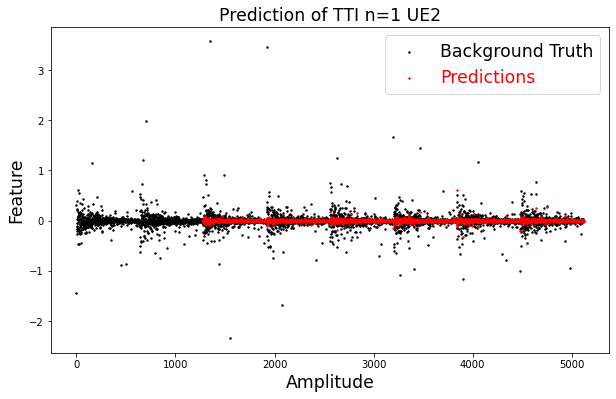

In [20]:
plot_1TTI(y_test, y_pred, X_test, samp_num, name_ds)



In [21]:
print(history.history.keys())

dict_keys(['loss', 'MSE', 'kl_loss', 'val_loss_val', 'val_MSE_val', 'val_kl_loss_val'])


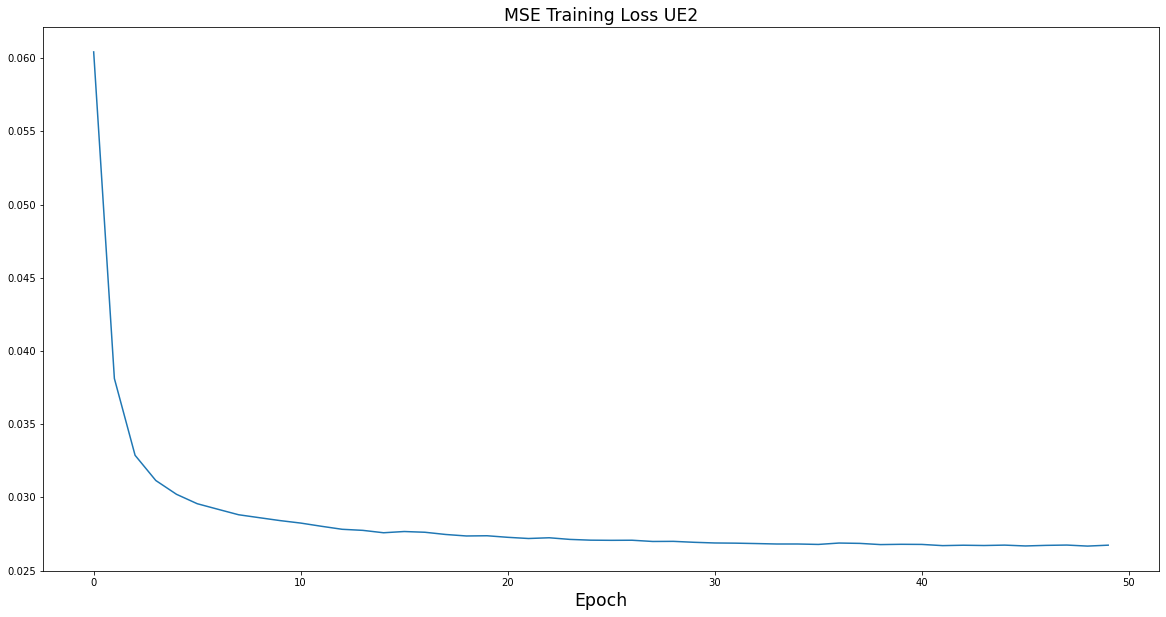

In [22]:
plot_mse_loss(history, name_ds)

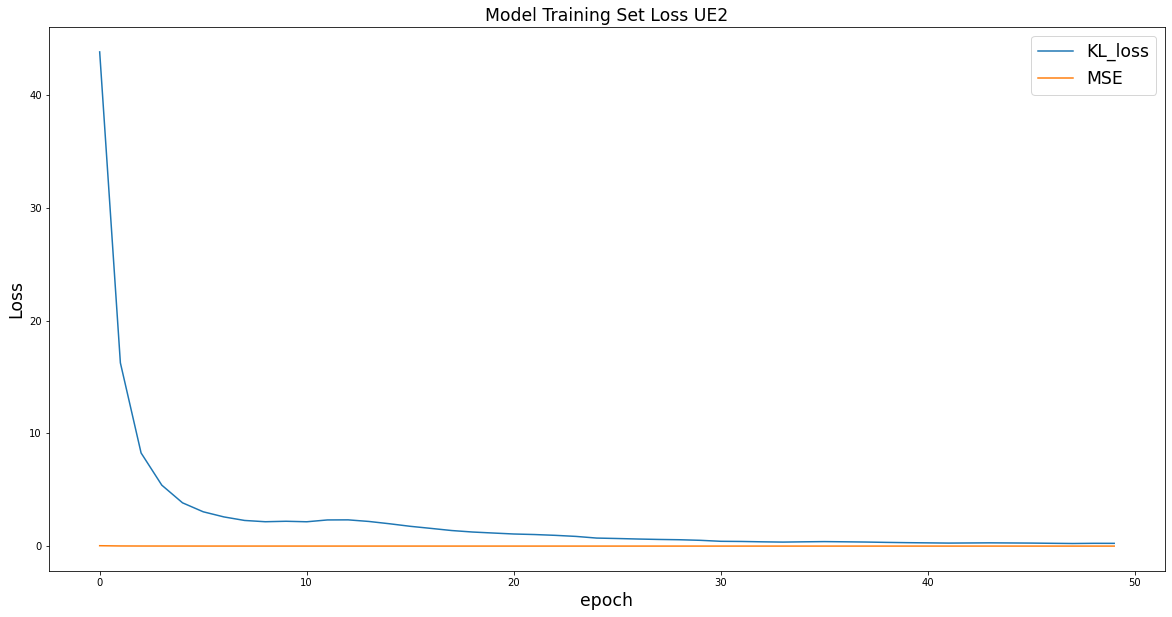

In [23]:
plot_kl_mse(history, name_ds)
    


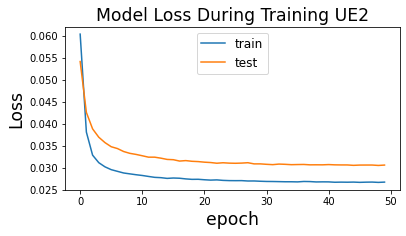

In [24]:
# summarize history for accuracy
plot_train_test(history, name_ds)


In [25]:
y_test.shape

(236, 3840)

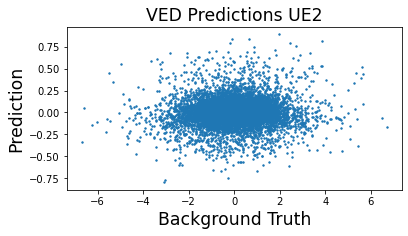

In [26]:
plot_pred_vs_true(y_pred, y_test, name_ds)

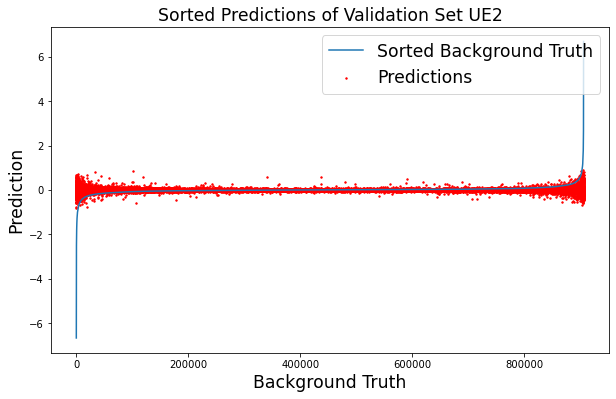

In [27]:
plot_sorted_vs_true(y_pred, y_test, name_ds)

    

# 

# Modeling

In [28]:
import scipy
data = pd.read_csv("../Data/data_UE1_600/data_unfold_UE1_600.csv", index_col=0).values

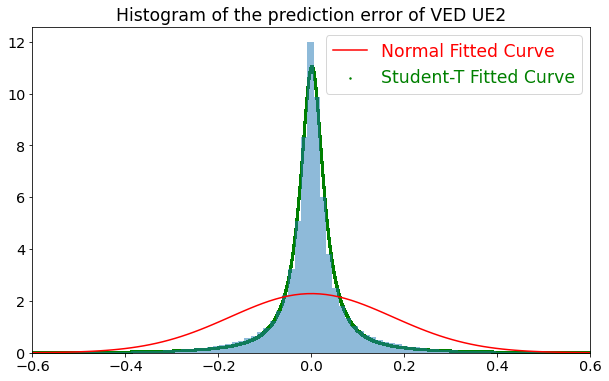

In [29]:
nbins = 1000
plot_modeling_prediction_error(data, y_test, y_pred, name_ds, nbins)

# Reconstruct the validation set

In [30]:
from matplotlib.pyplot import *


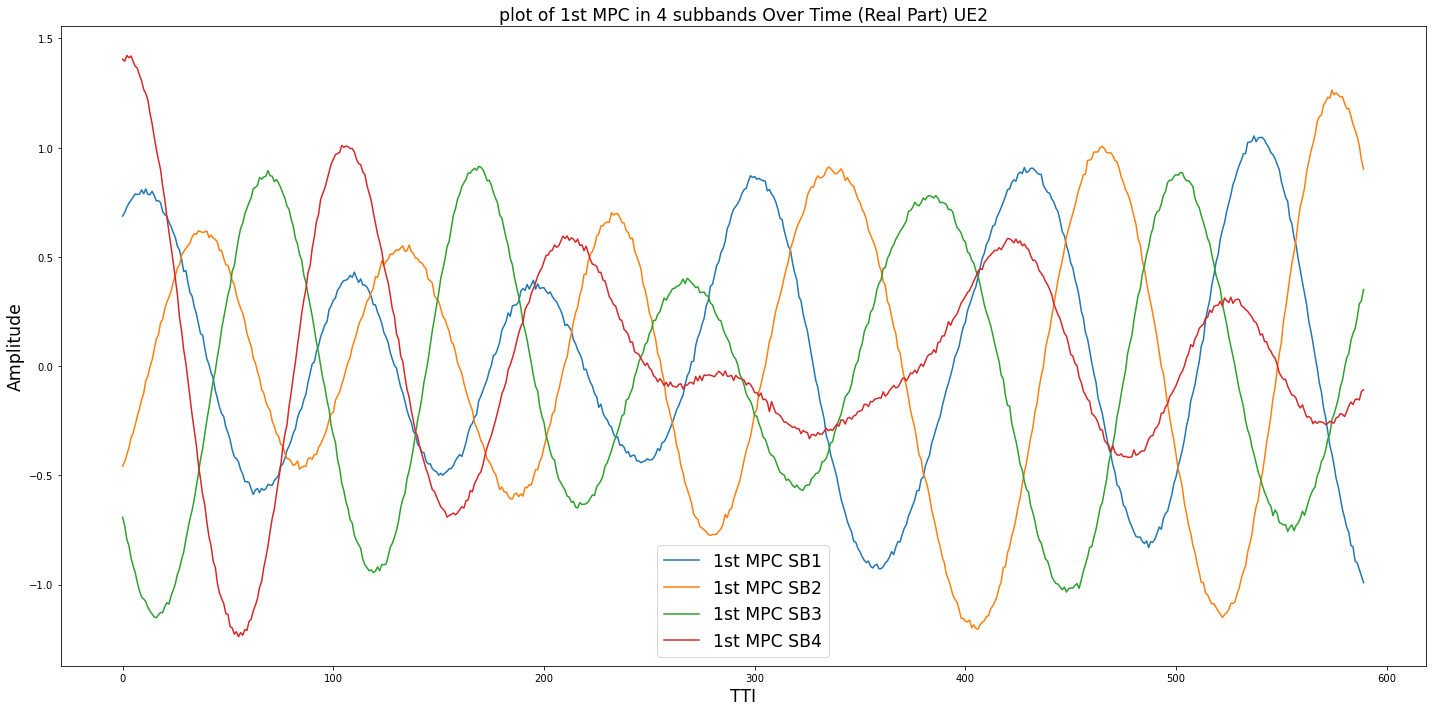

In [31]:
mpc=640

plot_MPC_overtime(data, mpc, name_ds, True)

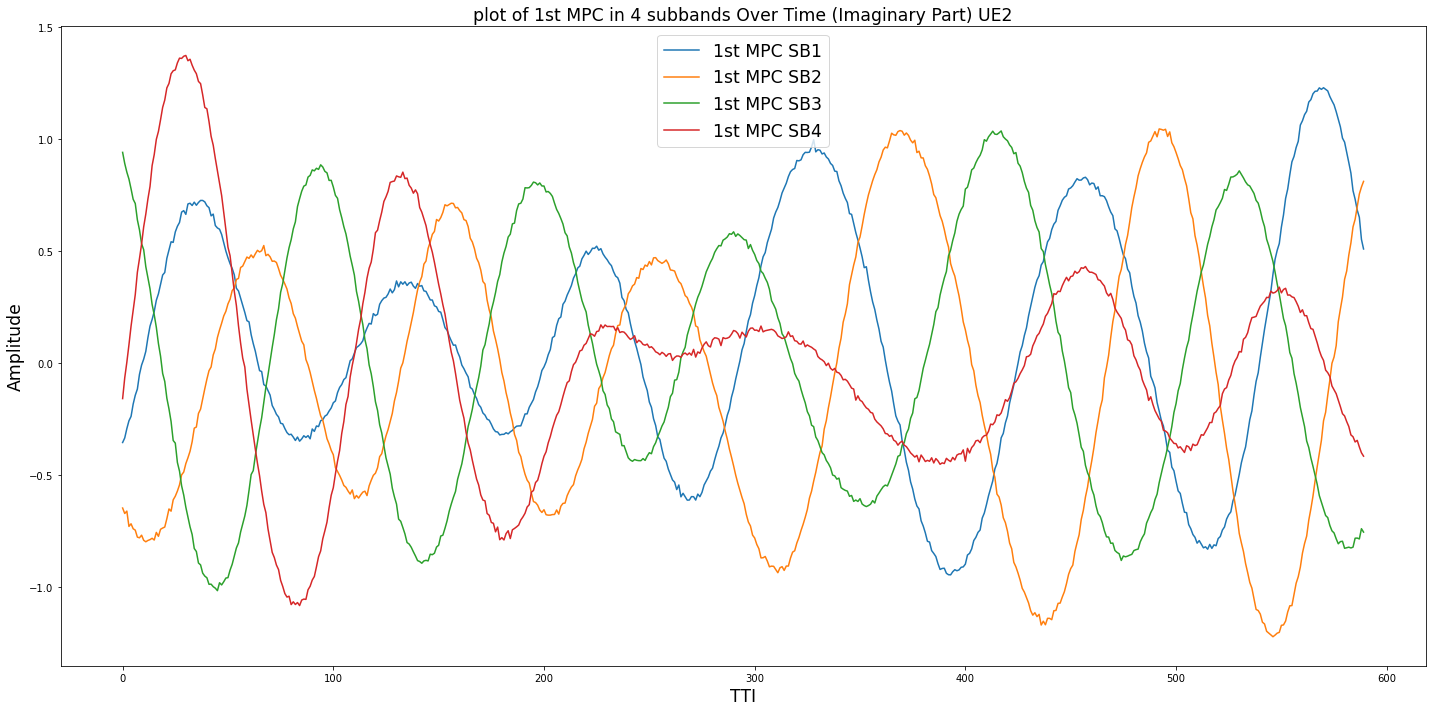

In [32]:
plot_MPC_overtime(data, mpc, name_ds, False)

# Reconstruct the validation set

In [33]:
y_pred = vae.predict(X_test_esc)


In [34]:
reconstruct_valid = reconstruct_validation(mpc, y_pred, X_test)


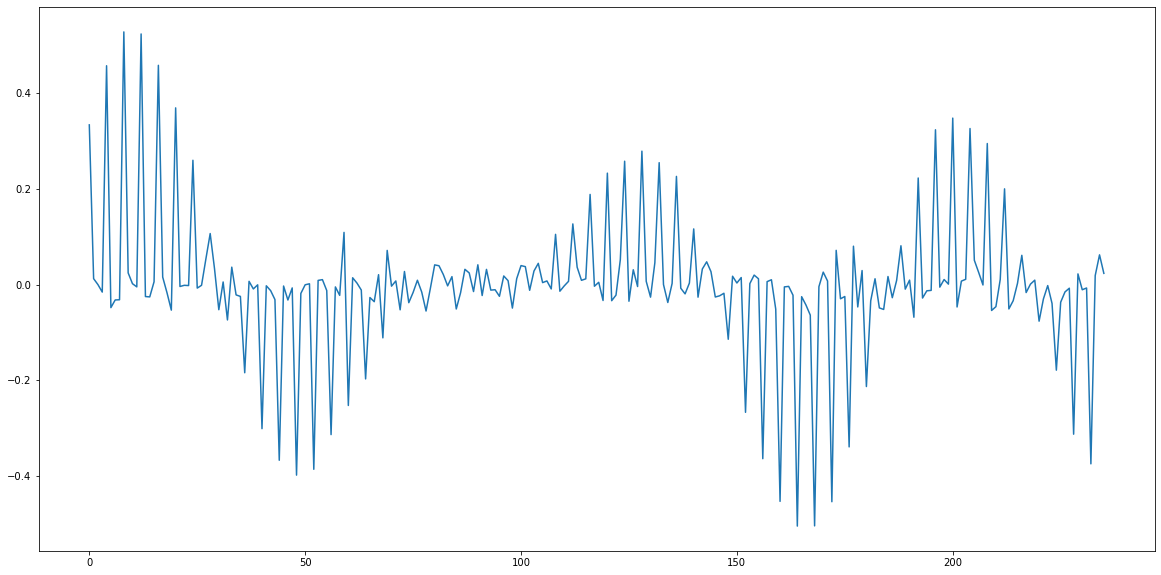

In [35]:
plot(reconstruct_valid[:,2])

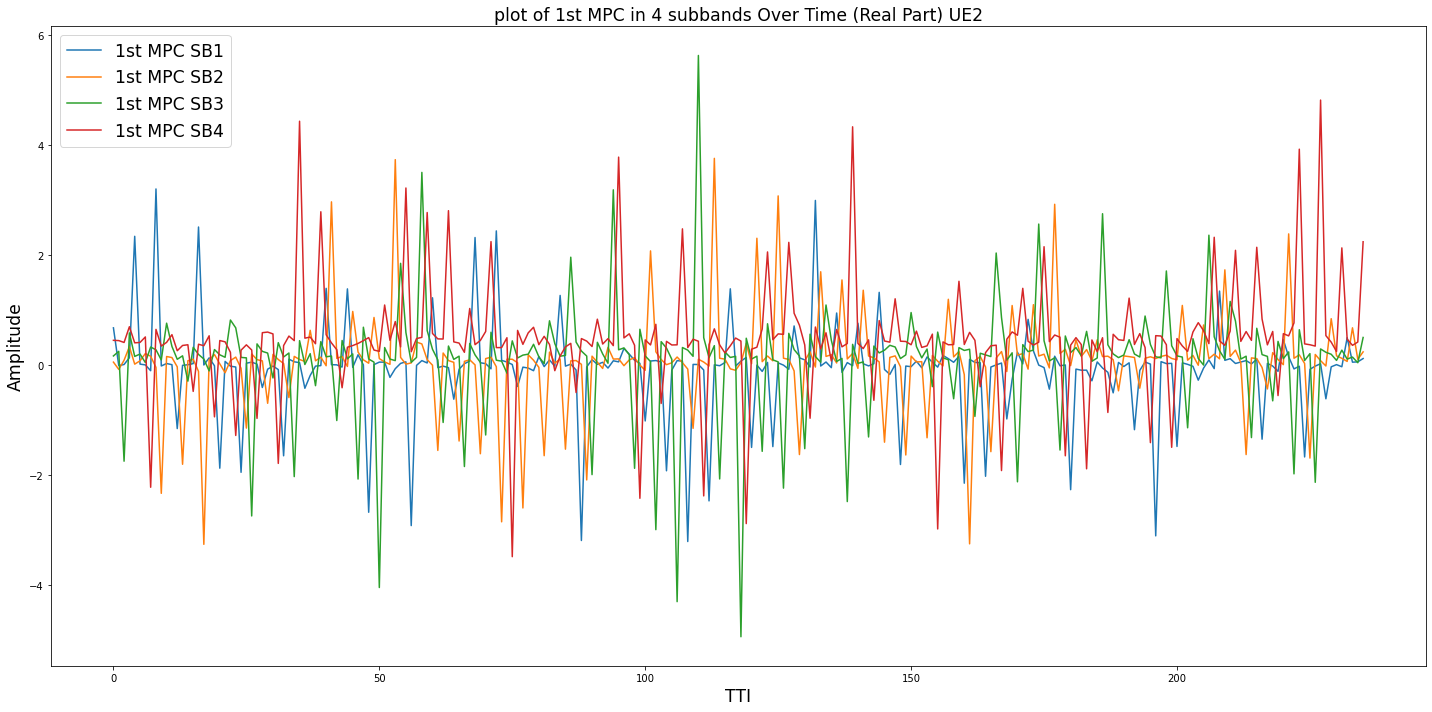

In [36]:
plot_MPC_overtime(reconstruct_valid, mpc, name_ds, True)
